# 04-线性回归之最小二乘-预测功率与电流之间的关系

In [6]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

## 导入数据

In [30]:
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
path1='../datas/household_power_consumption_1000.txt'
df = pd.read_csv(path1, sep=';', low_memory=False)#没有混合类型的时候可以通过low_memory=F调用更多内存，加快效率）

In [32]:
print(df.dtypes)

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [34]:
print(df.shape)

(1000, 9)


In [35]:
df.head(3)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,?,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0


In [43]:
df_group = df.groupby("Global_active_power")
list(df_group.groups.keys())

['0.206',
 '0.208',
 '0.210',
 '0.212',
 '0.216',
 '0.218',
 '0.220',
 '0.222',
 '0.224',
 '0.226',
 '0.228',
 '0.232',
 '0.240',
 '0.242',
 '0.246',
 '0.254',
 '0.256',
 '0.262',
 '0.268',
 '0.276',
 '0.282',
 '0.284',
 '0.286',
 '0.288',
 '0.290',
 '0.292',
 '0.298',
 '0.300',
 '0.302',
 '0.304',
 '0.306',
 '0.308',
 '0.312',
 '0.314',
 '0.316',
 '0.318',
 '0.320',
 '0.322',
 '0.326',
 '0.328',
 '0.330',
 '0.332',
 '0.336',
 '0.338',
 '0.342',
 '0.356',
 '0.362',
 '0.364',
 '0.368',
 '0.370',
 '0.376',
 '0.380',
 '0.382',
 '0.384',
 '0.386',
 '0.388',
 '0.398',
 '0.400',
 '0.402',
 '0.406',
 '0.412',
 '0.414',
 '0.416',
 '0.422',
 '0.424',
 '0.430',
 '0.436',
 '0.444',
 '0.472',
 '0.478',
 '0.484',
 '0.492',
 '0.504',
 '0.508',
 '0.516',
 '0.522',
 '0.538',
 '0.572',
 '0.574',
 '0.590',
 '0.592',
 '0.596',
 '0.604',
 '0.608',
 '0.612',
 '0.616',
 '0.636',
 '0.638',
 '0.642',
 '0.656',
 '0.658',
 '0.660',
 '0.664',
 '0.666',
 '0.674',
 '0.682',
 '0.694',
 '0.700',
 '0.712',
 '0.716',


## 对数据集增加偏置，并去除掉不需要的列

In [50]:
# b = pd.DataFrame([1] * df.shape[0],columns=["b"]) #建立一列为1的dataframe，起名为b作为偏置项
# df = pd.concat([df,b],axis=1)#将偏置项合并到原始dataframe

df["b"]=1
#获取Global_active_power、Global_reactive_power、Global_intensity和偏置列b的dataframe
df = df[["Global_active_power","Global_reactive_power","b","Global_intensity"]]

In [51]:
print(df.shape)
df.head(5)

(999, 4)


,Global_active_power,Global_reactive_power,b,Global_intensity
1,5.360,0.436,1,23.0
2,5.374,0.498,1,23.0
3,5.388,0.502,1,23.0
4,3.666,0.528,1,15.8
5,3.520,0.522,1,15.0


## 异常数据处理

In [52]:
df = df.replace("?",np.nan).dropna()  # 只要有特征为空，就进行删除操作
df["Global_active_power"] = df["Global_active_power"].astype(np.float64)#将字符串转为浮点

df.dtypes

Global_active_power      float64
Global_reactive_power    float64
b                          int64
Global_intensity         float64
dtype: object

## 分离X和Y

In [54]:
#获取"Global_active_power","Global_reactive_power","b"为X
X_data = df.iloc[:, :-1]

#获取Global_intensity作为Y
Y_data = df.iloc[:,[-1]]

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

In [56]:
X = np.mat(X_train)
Y = np.mat(Y_train).reshape(-1,1)

## 正规方程法求解参数

In [58]:
theta = (X.T*X).I*X.T*Y
theta

matrix([[4.10483296],
        [0.63243658],
        [0.36418216]])

## 构建预测模型

In [59]:
y_hat = np.mat(X_test) * theta

## 结果可视化

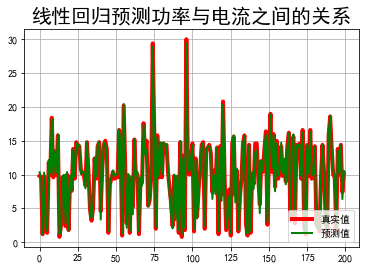

In [65]:
#### 电流关系
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=4, label=u'真实值')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

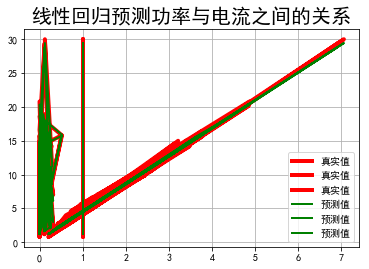

In [66]:
#### 电流关系
plt.figure(facecolor='w')
plt.plot(X_test, Y_test, 'r-', linewidth=4, label=u'真实值')
plt.plot(X_test, y_hat, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

## 调库实现

In [3]:
import numpy as np
import pandas as pd

path='../datas/household_power_consumption_1000.txt'
df = pd.read_csv(path,sep=";")#使用pandas加载csv

## 对数据集增加偏置，并去除掉不需要的列
df["b"]=1
#获取Global_active_power、Global_reactive_power、Global_intensity和偏置列b的dataframe
df = df[["Global_active_power","Global_reactive_power","b","Global_intensity"]]

## 异常数据处理
df = df.replace("?",np.nan).dropna() # 只要有特征为空，就进行删除操作
df["Global_active_power"] = df["Global_active_power"].astype(np.float64)#将字符串转为浮点

## 分离X和Y
#获取"Global_active_power","Global_reactive_power","b"为X
X = df.iloc[:,:-1]
Y = df.iloc[:,[-1]] #获取Global_intensity作为Y

## 划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train,Y_train)

print(model.coef_)
print(model.score(X_test,Y_test))

[[4.10483296 0.63243658 0.36418216]]
0.9923458159908412
